In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
import pandas as pd
import cv2
from time import sleep
import os
import numpy as np

In [2]:
input_shape = (160,160)
COLOR_ENCODER = {0:"BLACK",1:"BLUE",2:"BROWN",3:"GREEN",4:"GREY",5:"ORANGE",6:"RED",7:"VIOLET",8:"WHITE",9:"YELLOW"}
train_dataset = image_dataset_from_directory("training_dataset",
                                            shuffle=True,
                                            batch_size=32,
                                            image_size=input_shape,
                                            validation_split=0.2,
                                            subset="training",
                                            seed=42)

validation_dataset = image_dataset_from_directory("training_dataset",
                                            shuffle=True,
                                            batch_size=32,
                                            image_size=input_shape,
                                            validation_split=0.2,
                                            subset="validation",
                                            seed=42)

Found 250 files belonging to 10 classes.
Using 200 files for training.
Found 250 files belonging to 10 classes.
Using 50 files for validation.


2023-03-07 11:28:11.934106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 11:28:11.934656: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


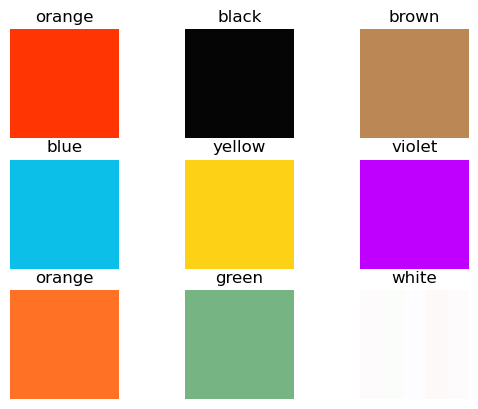

In [3]:
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [5]:
def AlexNet(image_shape):
    
    input_img = tf.keras.layers.Input(shape=image_shape)
    rescaling = tf.keras.layers.Rescaling(1./255, 
                                          input_shape=(image_shape))(input_img)
    l1 = tf.keras.layers.Conv2D(filters=96, kernel_size=11,
                              strides=(4,4),
                              activation='relu')(rescaling)
    
    l1 = tf.keras.layers.MaxPooling2D(pool_size=(3,3),
                                     strides=2)(l1)
    
    l2 = tf.keras.layers.Conv2D(filters=256, kernel_size=5,
                               padding='same',
                               activation='relu')(l1)
    
    l2 = tf.keras.layers.MaxPooling2D(pool_size=(3,3),
                                     strides=2)(l2)
    
    l3 = tf.keras.layers.Conv2D(filters=384, kernel_size=3,
                              padding='same',
                              activation='relu')(l2)
    
    l4 = tf.keras.layers.Conv2D(filters=384, kernel_size=3,
                              padding='same',
                              activation='relu')(l3)
    
    l5 = tf.keras.layers.Conv2D(filters=256, kernel_size=3,
                          padding='same',
                          activation='relu')(l4)
    
    l5 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), 
                                    strides=2)(l5)
    
    D1 = tf.keras.layers.Flatten()(l5)
    D2 = tf.keras.layers.Dense(4096,activation='relu')(D1)
    D3 = tf.keras.layers.Dense(4096,activation='relu')(D2)
    output = tf.keras.layers.Dense(10,activation='softmax')(D3)
    
    model = tf.keras.Model(inputs=input_img, outputs=output)
    return model

def show_pic(picture):
    plt.figure(figsize=(5,5))
    plt.pause(0.05)
    plt.imshow(picture)

In [6]:
model1 = AlexNet((160,160,3))

In [7]:
model1.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 38, 38, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                         

In [9]:
history = model1.fit(train_dataset,epochs=150,
                     validation_data=validation_dataset)

Epoch 1/150


/home/faisal/miniconda3/envs/TFcpu/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 3s 326ms/step - loss: 2.8124 - accuracy: 0.0750 - val_loss: 2.2972 - val_accuracy: 0.1200
Epoch 2/150
7/7 [==============================] - 2s 334ms/step - loss: 2.2796 - accuracy: 0.1600 - val_loss: 2.1473 - val_accuracy: 0.1000
Epoch 3/150
7/7 [==============================] - 2s 254ms/step - loss: 1.9942 - accuracy: 0.3000 - val_loss: 1.6683 - val_accuracy: 0.3200
Epoch 4/150
7/7 [==============================] - 2s 323ms/step - loss: 2.0809 - accuracy: 0.3150 - val_loss: 2.1358 - val_accuracy: 0.2600
Epoch 5/150
7/7 [==============================] - 2s 287ms/step - loss: 1.8440 - accuracy: 0.3650 - val_loss: 1.4199 - val_accuracy: 0.4400
Epoch 6/150
7/7 [==============================] - 2s 313ms/step - loss: 1.4490 - accuracy: 0.4200 - val_loss: 1.2774 - val_accuracy: 0.4600
Epoch 7/150
7/7 [==============================] - 2s 325ms/step - loss: 1.3968 - accuracy: 0.4550 - val_loss: 1.7884 - val_accuracy: 0.3600
Epoch 8/150
7/7 [========

/tmp/ipykernel_93635/974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_93635/974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

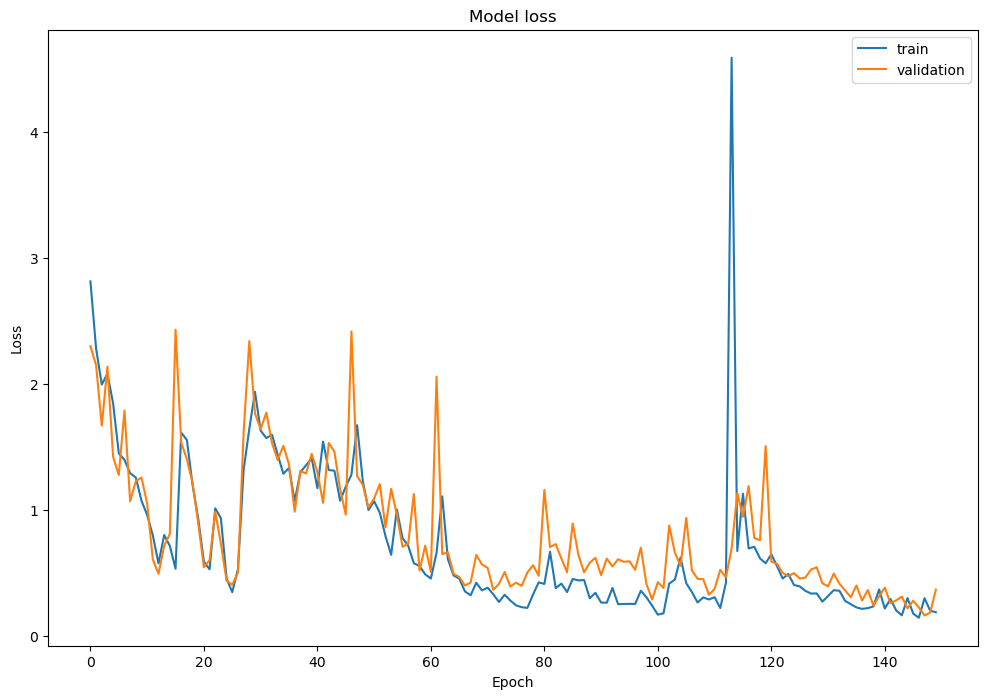

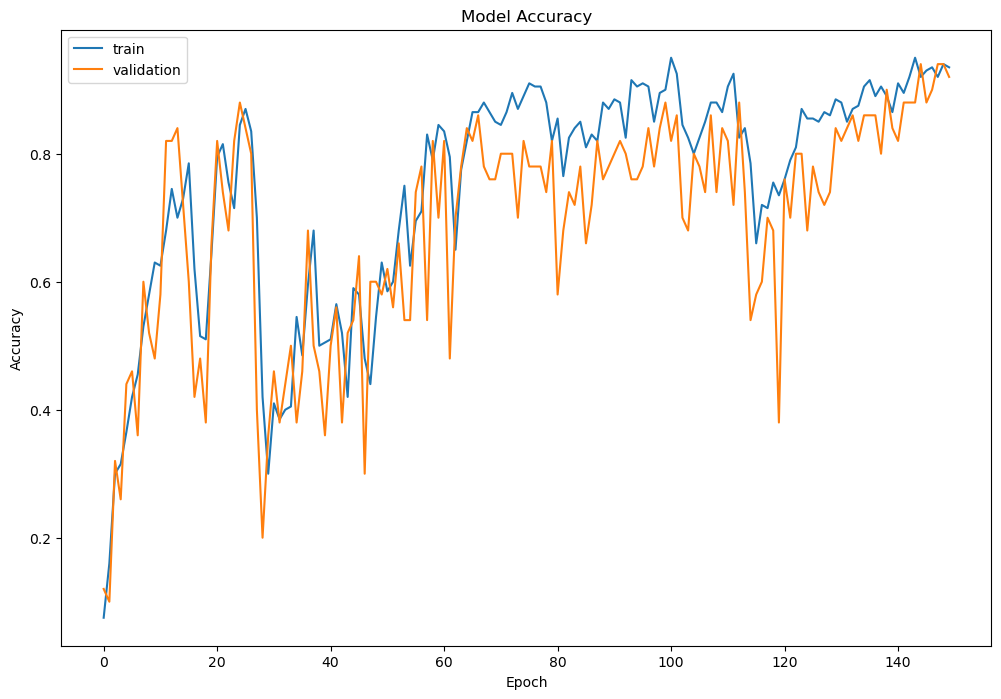

In [10]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [11]:
preds = model1.evaluate(validation_dataset)

2/2 [==============================] - 0s 33ms/step - loss: 0.3684 - accuracy: 0.9200


In [12]:
model1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001*0.1),
                metrics=['accuracy'])

In [13]:
x = model1.fit(train_dataset, epochs=250,
              initial_epoch = history.epoch[-1],
              validation_data=validation_dataset)

Epoch 150/250


/home/faisal/miniconda3/envs/TFcpu/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 3s 366ms/step - loss: 0.2079 - accuracy: 0.9350 - val_loss: 0.3486 - val_accuracy: 0.8600
Epoch 151/250
7/7 [==============================] - 2s 256ms/step - loss: 0.1261 - accuracy: 0.9350 - val_loss: 0.3107 - val_accuracy: 0.9000
Epoch 152/250
7/7 [==============================] - 3s 353ms/step - loss: 0.0994 - accuracy: 0.9700 - val_loss: 0.3026 - val_accuracy: 0.9000
Epoch 153/250
7/7 [==============================] - 2s 318ms/step - loss: 0.0924 - accuracy: 0.9700 - val_loss: 0.2709 - val_accuracy: 0.9000
Epoch 154/250
7/7 [==============================] - 2s 321ms/step - loss: 0.0836 - accuracy: 0.9750 - val_loss: 0.2531 - val_accuracy: 0.9000
Epoch 155/250
7/7 [==============================] - 2s 317ms/step - loss: 0.0743 - accuracy: 0.9800 - val_loss: 0.2392 - val_accuracy: 0.9000
Epoch 156/250
7/7 [==============================] - 2s 324ms/step - loss: 0.0700 - accuracy: 0.9800 - val_loss: 0.2324 - val_accuracy: 0.9000
Epoch 157/250

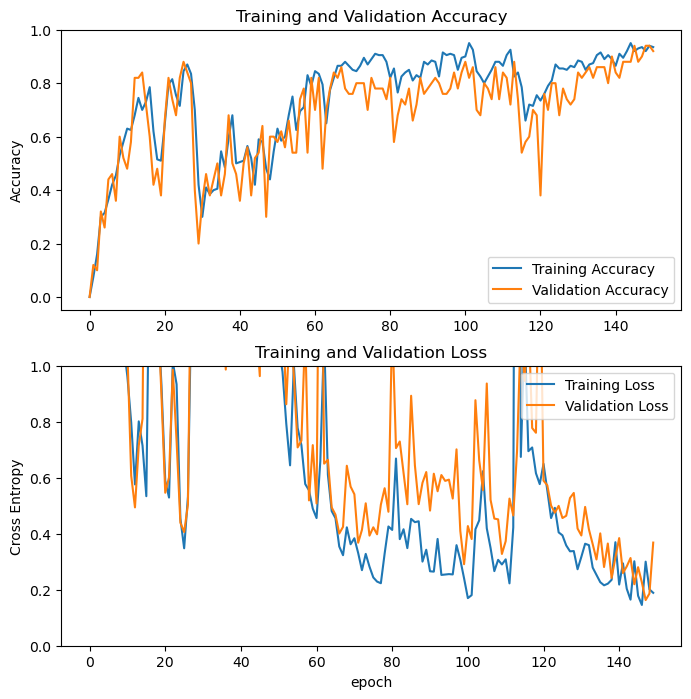

In [14]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 76ms/step
BROWN orange5.png


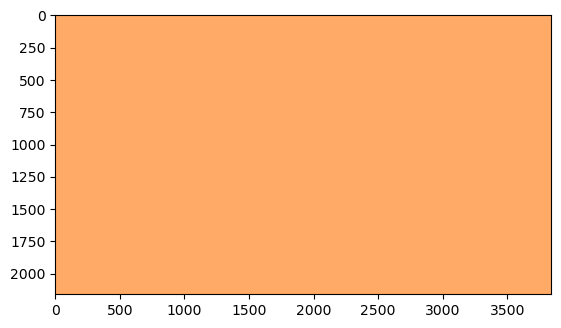

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
WHITE gray1.png


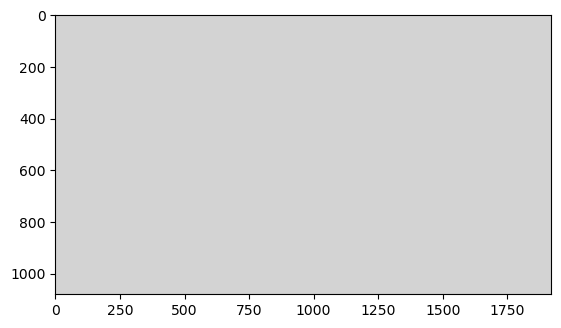

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 20ms/step
RED red.jpeg


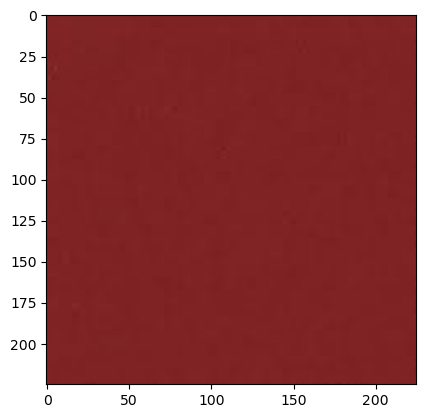

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
VIOLET light-violet-color-solid-background-1920x1080.png


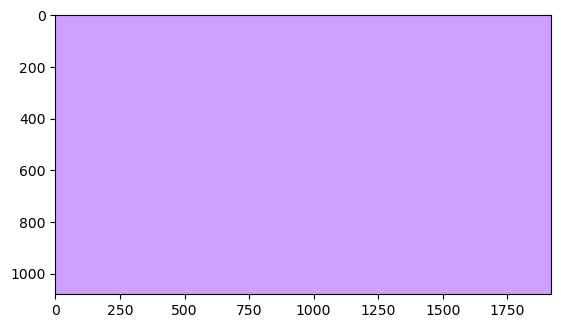

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
YELLOW yellow2.png


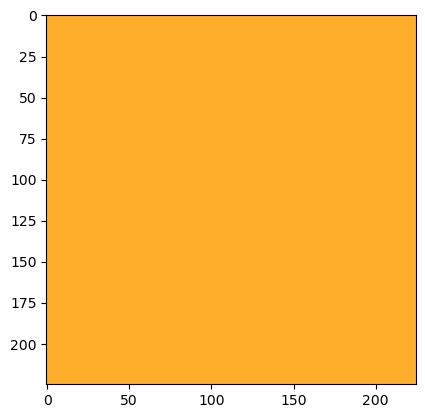

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
WHITE colors-gray.png


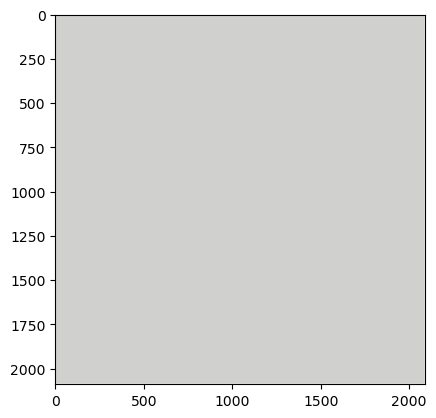

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
BLUE blue4.jpg


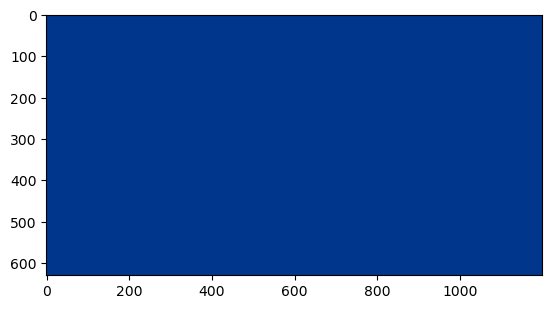

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 20ms/step
ORANGE orange.png


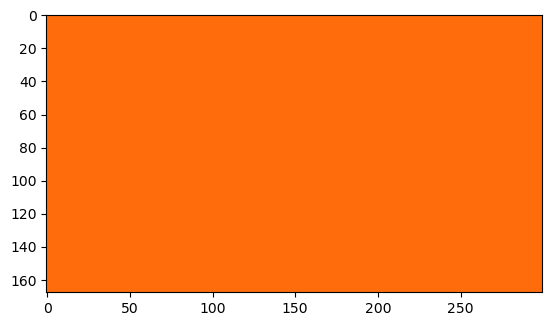

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
BLACK black1.jpg


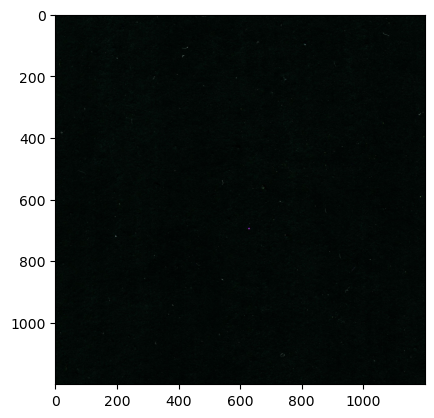

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
RED red3.jpg


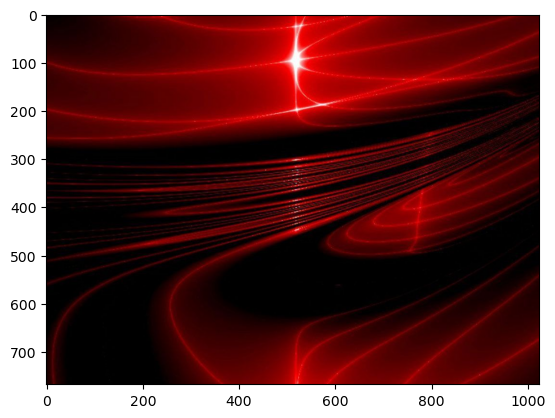

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
WHITE Color-white.JPG


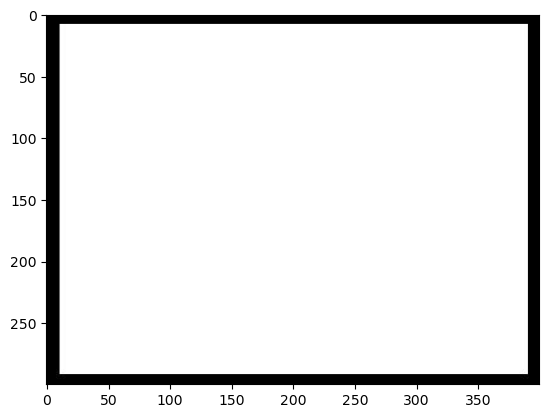

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
BLUE blue1.jpeg


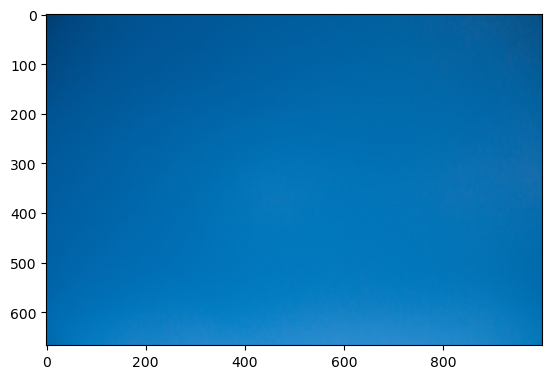

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
YELLOW yellow_4.png


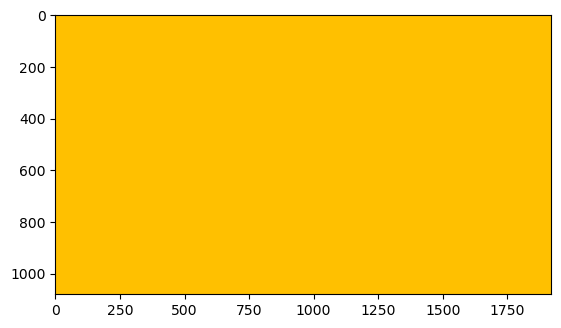

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
RED red1.png


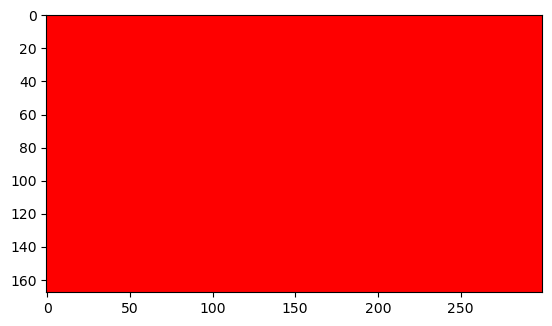

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
BROWN brown3.png


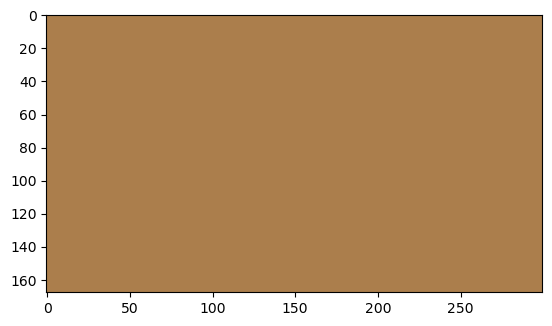

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
BLACK black.jpg


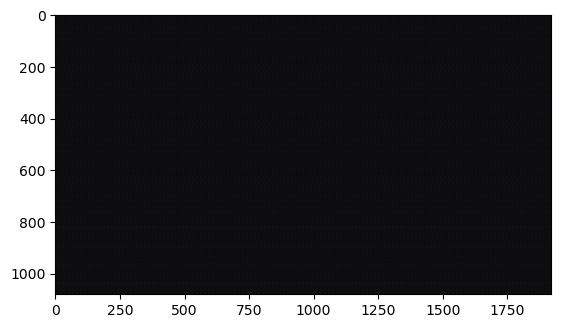

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 20ms/step
VIOLET violet-color-solid-background-1920x1080.png


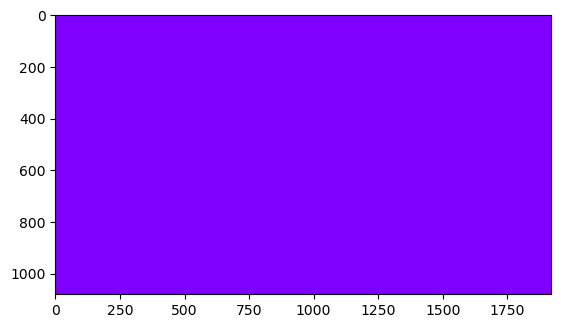

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
BROWN light-brown-color-solid-background-1920x1080.png


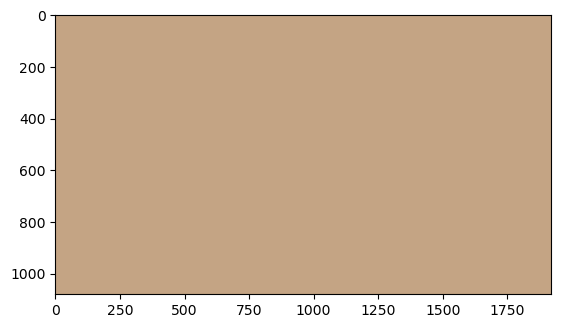

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
VIOLET violet1.png


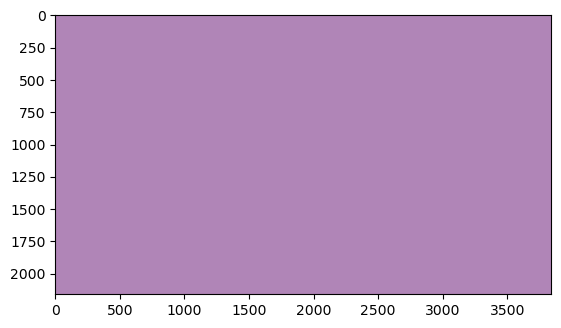

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
WHITE white2.png


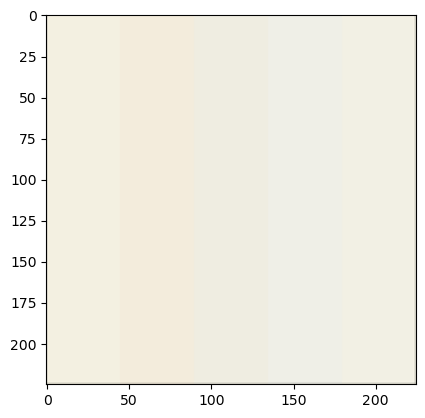

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
GREY green4.png


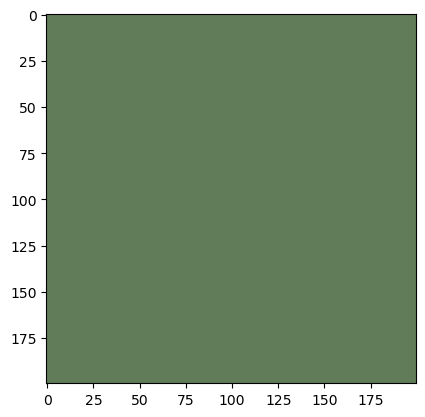

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 20ms/step
VIOLET pink.png


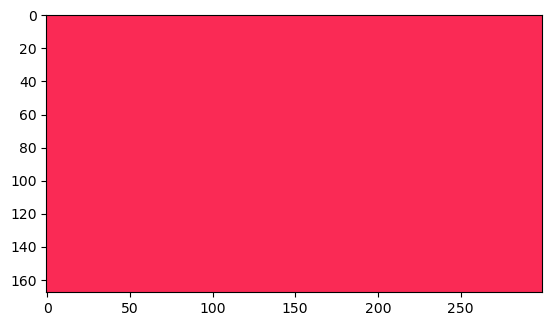

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
RED photo-1593005510509-d05b264f1c9c.jpeg


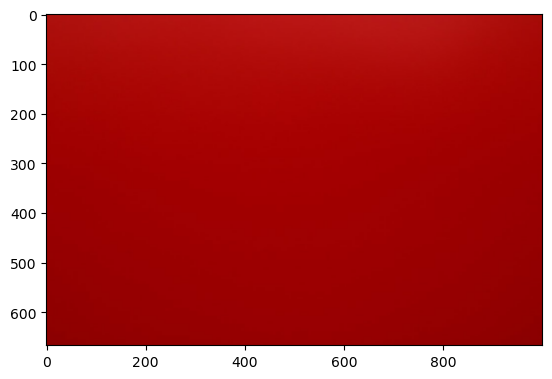

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
WHITE white3.png


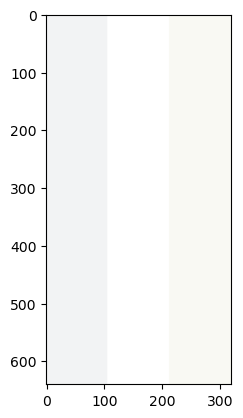

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
ORANGE orange-color-solid-background-1920x1080.png


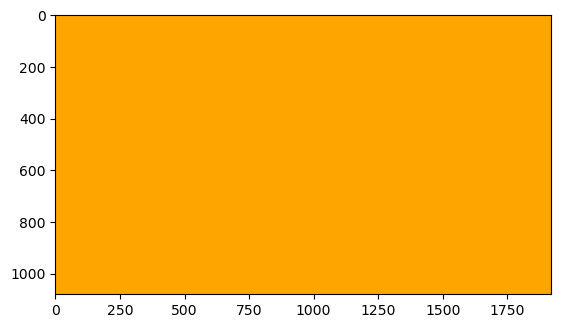

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
VIOLET violet6.png


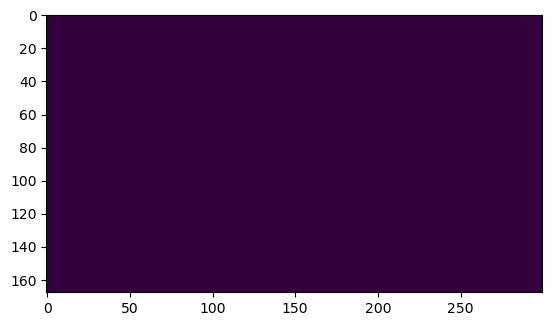

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
BLACK Black_colour.jpg


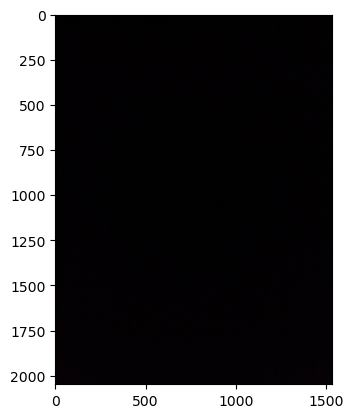

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
BROWN dark-brown-color-solid-background-1920x1080.png


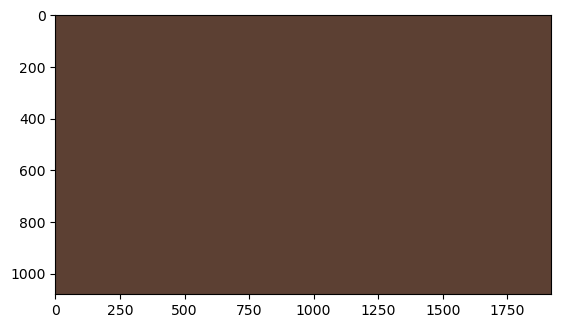

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
BROWN brown1.png


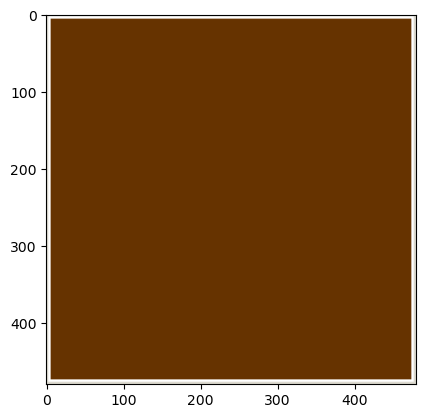

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
BLACK black3.jpg


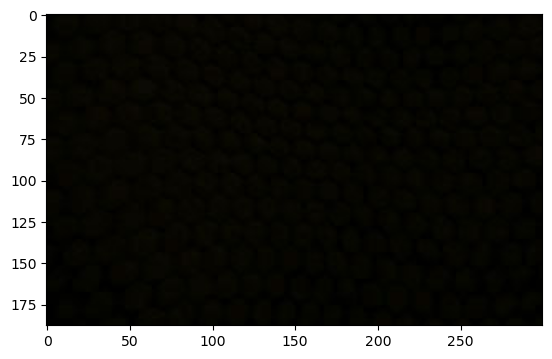

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
VIOLET violet.png


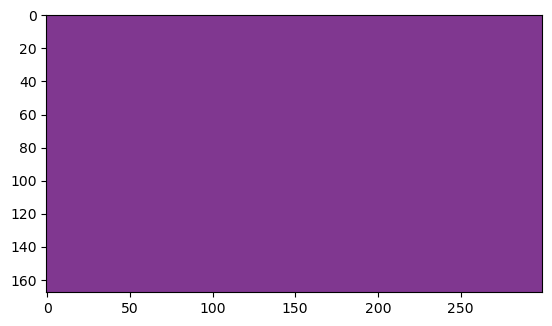

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
GREEN dark-green-color-solid-background-1920x1080.png


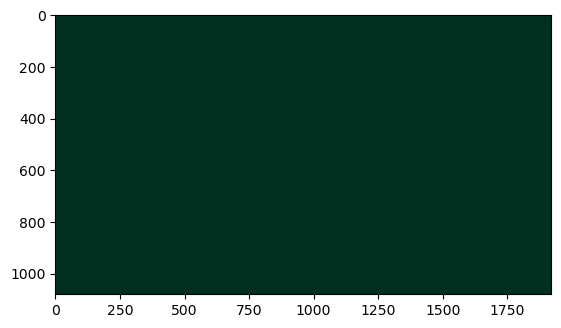

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
WHITE white3.jpeg


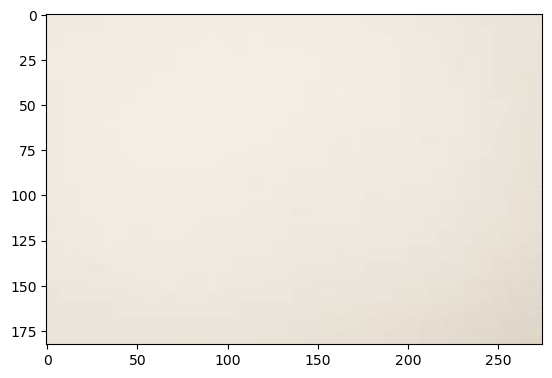

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
RED red-color-solid-background-1920x1080.png


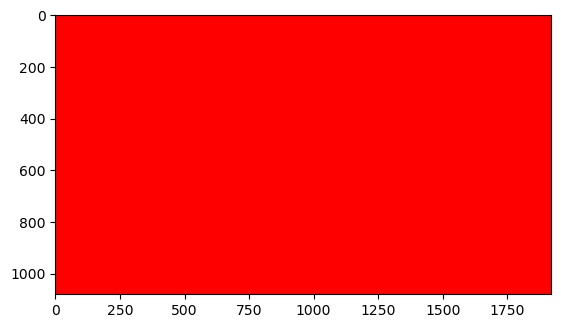

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
WHITE bone-white.jpg


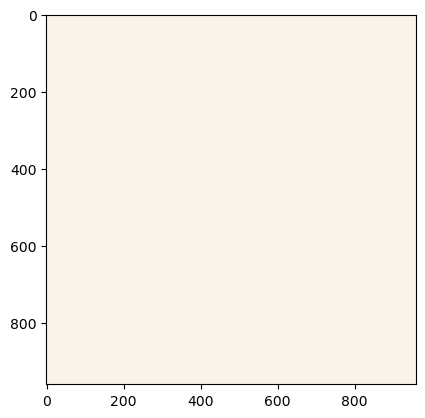

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
YELLOW yellow.jpeg


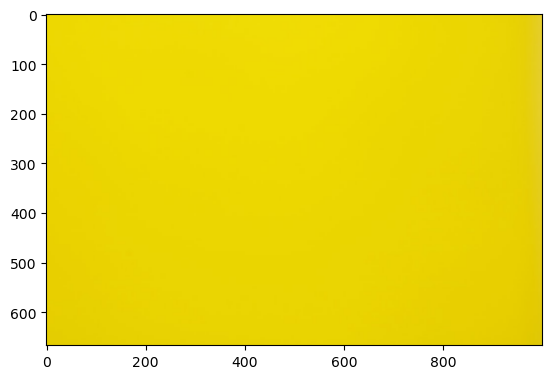

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
GREEN green3.png


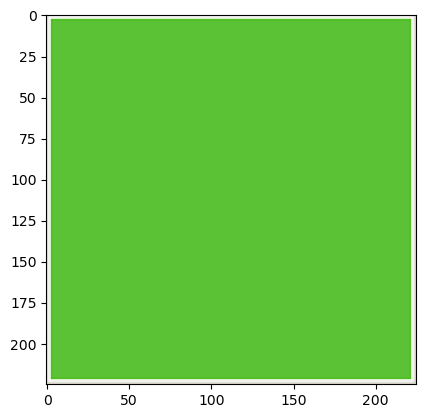

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
BLUE Solid_blue.png


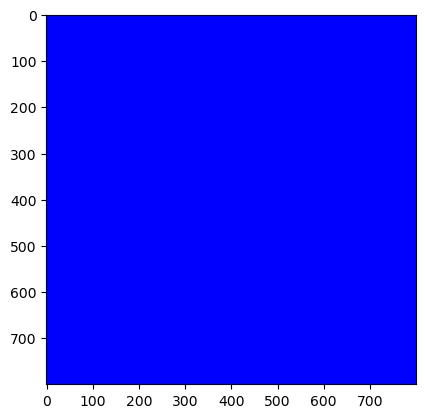

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
GREY gray2.png


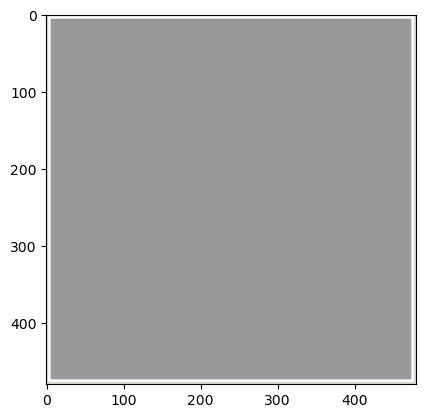

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
RED Red_Color.jpg


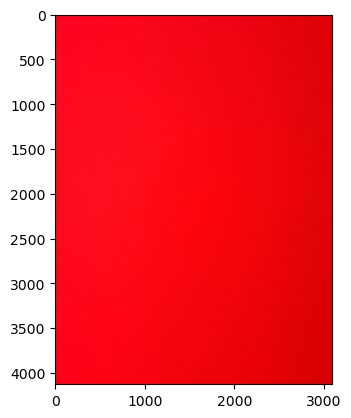

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
GREY gray.png


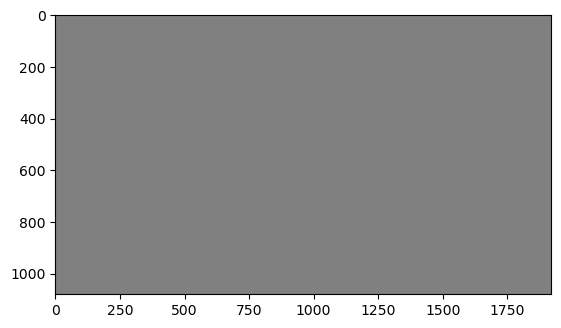

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
ORANGE orange2.png


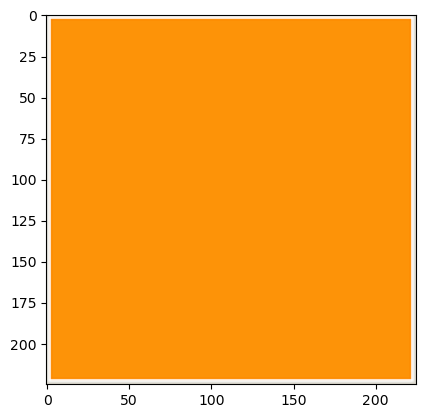

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 20ms/step
GREEN neon-green-color-solid-background-1920x1080.png


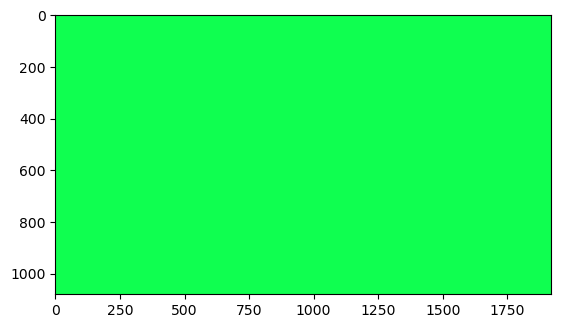

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 20ms/step
GREEN green2.png


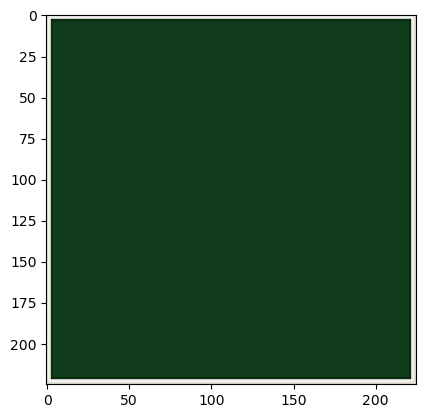

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
BLUE Color-blue.JPG


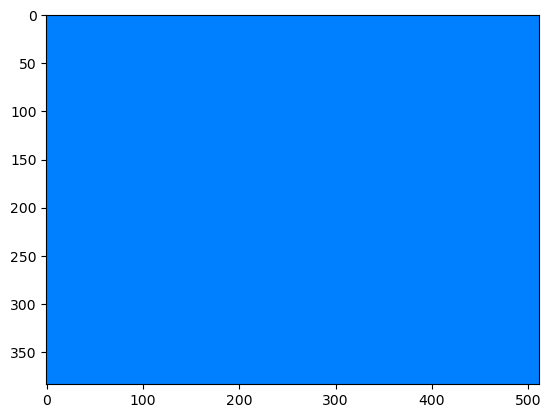

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
WHITE white.png


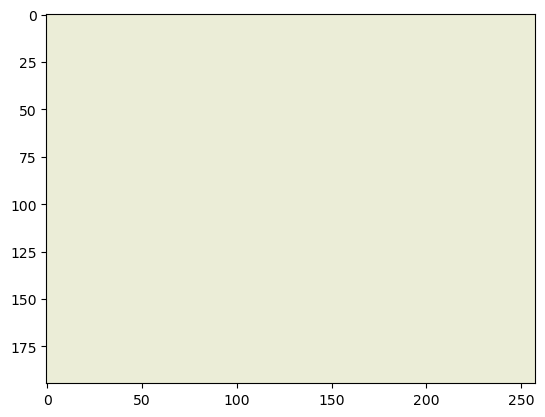

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
YELLOW yellow1.jpeg


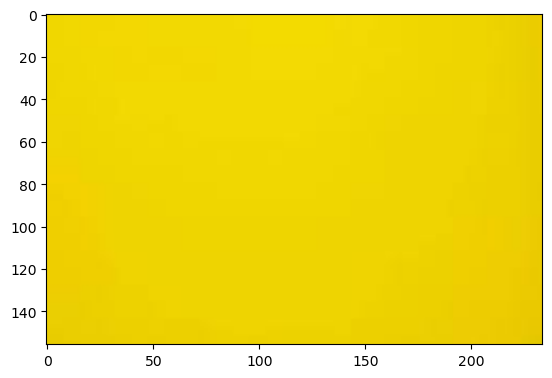

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
WHITE white-color-solid-background-1920x1080.png


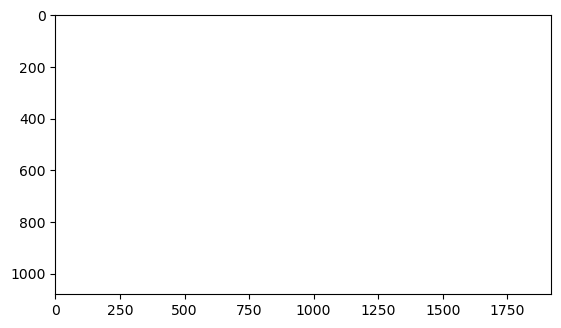

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 19ms/step
ORANGE orange-ochre-painted-swatch-F.jpg


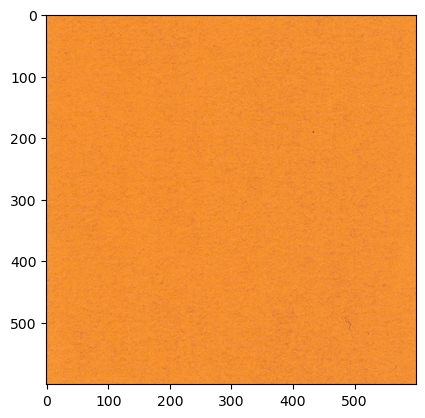

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 20ms/step
VIOLET violet3.png


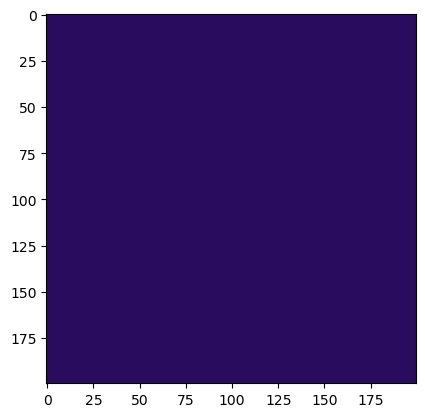

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
GREEN light-green-color-solid-background-1920x1080.png


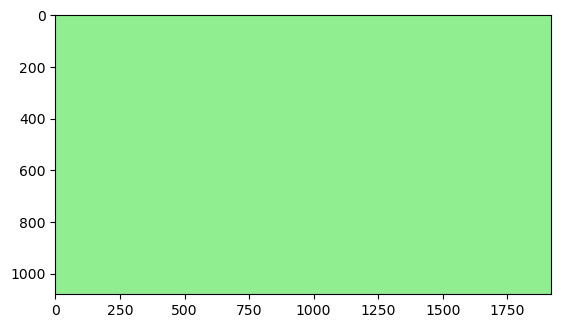

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 18ms/step
GREEN green.png


In [ ]:
path = 'test_color'
for i in os.listdir('test_color'):
    color = cv2.cvtColor(cv2.imread(os.path.join(path,i)),cv2.COLOR_BGR2RGB)
    color_reshape = cv2.resize(color, (160,160)).reshape(1,160,160,3)
    show_pic(color)
    print(COLOR_ENCODER[np.argmax(model1.predict(color_reshape))],i)
    sleep(1)